# Computer Vision Assignment # 1 
Prepared by : Saeed Ahmad
Reg # : 362002

#### Reading Data from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
cd drive/MyDrive/


/content/drive/MyDrive


In [3]:
import cv2
import numpy as np
import pandas as pd
import os
import sklearn
from skimage.feature import hog

In [4]:
from google.colab.patches import cv2_imshow

#### A sample Image

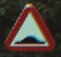

In [5]:
img = cv2.imread("/content/drive/MyDrive/Assignment Data/00001/00025_00000.ppm")
cv2_imshow(img)

In [7]:
cd ..

/content/drive/MyDrive


In [8]:
directory = "/content/drive/MyDrive/Assignment Data"
classes  = os.listdir(directory)

####  Function Defination to split Data into seperate train and test folders within the class folders

In [58]:
import shutil
def train_test_split(classes):
  for dir in classes:
    class_dir = os.path.join(directory, dir)
    test_txt_path = os.path.join(class_dir, "test.txt")
    train_dir = os.path.join(class_dir, "train")
    test_dir = os.path.join(class_dir, "test")
    if  not os.path.isdir(train_dir):
      os.mkdir(train_dir)
    if  not os.path.isdir(test_dir):
      os.mkdir(test_dir)
    with open(test_txt_path, "r") as f:
      lines = f.readlines()
    for img in os.listdir(class_dir):
      img_path = os.path.join(class_dir, img)
      x = img + "\n"
      if x in lines:
        if os.path.isfile(img_path):
          shutil.copy(img_path, os.path.join(test_dir, img))
      else:
        if os.path.isfile(img_path):
          shutil.copy(img_path, os.path.join(train_dir, img))

### Random Samples from the dataset

In [14]:
import random
sample_images  = []
directory1 = "/content/drive/MyDrive/Assignment Data"
classes  = os.listdir(directory1)
for clas in  classes:
  sample_images.append(directory1+'/'+clas+'/'+random.choice(os.listdir(os.path.join(directory1, clas))))
  sample_images.append(directory1+'/'+clas+'/'+random.choice(os.listdir(os.path.join(directory1, clas))))


In [15]:
sample_images

['/content/drive/MyDrive/Assignment Data/00003/01764_00002.ppm',
 '/content/drive/MyDrive/Assignment Data/00003/00224_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00005/01171_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00005/01168_00002.ppm',
 '/content/drive/MyDrive/Assignment Data/00001/01556_00002.ppm',
 '/content/drive/MyDrive/Assignment Data/00001/01584_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00008/01963_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00008/00862_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00004/00987_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00004/01189_00000.ppm',
 '/content/drive/MyDrive/Assignment Data/00006/00170_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00006/01513_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00010/00862_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00010/00448_00001.ppm',
 '/content/drive/MyDrive/Assignment Data/00009/00628_00001.ppm',
 '/content/drive/MyDrive/

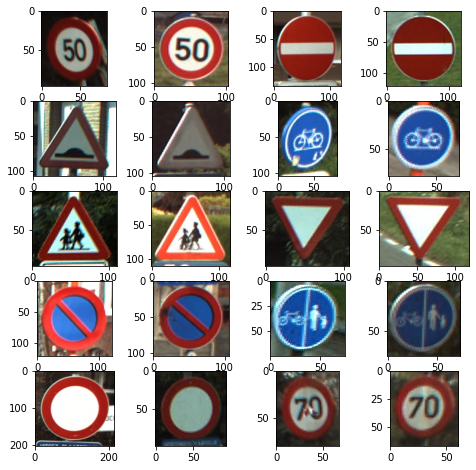

In [18]:
import random
import matplotlib.pyplot as plt
fig=plt.figure(figsize= (8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_path = sample_images[i-1]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

#### Function defination of extracting image features using Histogram of Oriented Gradients

In [19]:
def feature_extraction_HOG(direct):
  features = []
  labels = []
  hog_images = []
  image_names = []
  directory = "/content/drive/MyDrive/Assignment Data"
  classes  = os.listdir(directory)
  for dir in classes:
    class_dir = os.path.join(directory, dir)
    tr_dir = os.path.join(class_dir, direct)
    for img in os.listdir(tr_dir):
      img_path = os.path.join(tr_dir, img)
      img1 = cv2.imread(img_path)
      
      if img1 is not None:
        img1 = cv2.resize(img1, (50, 60))
        fd, hog_image = hog(img1, orientations=8, pixels_per_cell=(8, 8),
                      cells_per_block=(1, 1), visualize=True)
        features.append(fd)
        image_names.append(img)
        labels.append(int(dir))
        hog_images.append(hog_image)
      else:
        print(f"Cannot Read the Image from Path {img_path}")
  return features, labels, hog_images, image_names

    


#### Extracting Train and Test data features

In [20]:
train_features_hog, train_labels_hog, train_hog_images, trian_image_names = feature_extraction_HOG("train")
test_features_hog, test_labels_hog, _ , test_image_names= feature_extraction_HOG("test")

Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00003/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00003/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00005/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00005/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00001/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00001/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00008/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00008/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00004/train/test.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/00004/train/train.txt
Cannot Read the Image from Path /content/drive/MyDrive/Assignment Data/0000

## Supervised Paradigm

##### Visualizing HOG  (Histogram of Oriented Gradients)

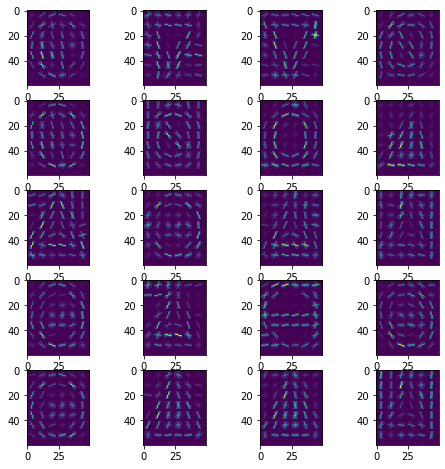

In [21]:
import random
import matplotlib.pyplot as plt
fig=plt.figure(figsize= (8,8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = train_hog_images[random.randint(0,800)]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

#### Random Forest Classifier


In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=30)
clf.fit(np.array(np.array(train_features_hog)), train_labels_hog)

RandomForestClassifier(n_estimators=30)

#### SVM Classifier

In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_features_hog, train_labels_hog)

SVC()

In [24]:
svc.score(np.array(test_features_hog), test_labels_hog)

0.995

In [25]:
clf.score(np.array(test_features_hog), test_labels_hog)

1.0

In [26]:
predictions = svc.predict(test_features_hog)
indices = []
for i in range(len(test_labels_hog)):
    if int(test_labels_hog[i]) != int(predictions[i]):
      indices.append(i)
test_image_names[indices[0]]

'00377_00000.ppm'

### Images Misclassified by SVM

In [32]:
predictions = clf.predict(test_features_hog)
indices = []
for i in range(len(test_labels_hog)):
    if int(test_labels_hog[i]) != int(predictions[i]):
      indices.append(i)
# test_image_names[indices[0]]

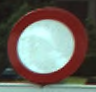

In [33]:
img = cv2.imread("/content/drive/MyDrive/Assignment Data/00007/00019_00001.ppm")
cv2_imshow(img)

#### Score/Metrics for SVM Classifier on test data

In [34]:
from sklearn.metrics import classification_report
print(classification_report(svc.predict(test_features_hog), test_labels_hog))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       0.95      1.00      0.97        19
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



#### Score/Metrics for Random Forest Classifier on test data

In [35]:
print(classification_report(clf.predict(test_features_hog), test_labels_hog))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Unsupervised Paradigm


In [37]:
from sklearn.cluster import KMeans

In [38]:
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(train_features_hog)
    distortions.append(kmeanModel.inertia_)

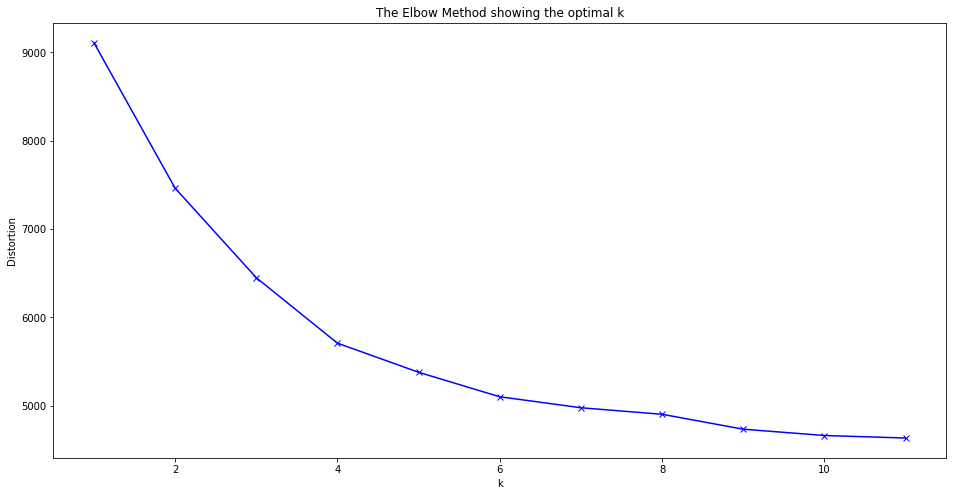

In [39]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
K = range(2,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    s = silhouette_score(train_features_hog, kmeanModel.fit_predict(train_features_hog))
    print(f"The silhouette socre for k = {k} is {s}")



The silhouette socre for k = 2 is 0.21669926685063906
The silhouette socre for k = 3 is 0.2582287332070657
The silhouette socre for k = 4 is 0.2483279309760084
The silhouette socre for k = 5 is 0.19714774059394194
The silhouette socre for k = 6 is 0.1872227255680663
The silhouette socre for k = 7 is 0.17690320232210283
The silhouette socre for k = 8 is 0.14311117009342808
The silhouette socre for k = 9 is 0.16627838786599336
The silhouette socre for k = 10 is 0.13414698345975634
The silhouette socre for k = 11 is 0.13121787106906102
The silhouette socre for k = 12 is 0.11933804447120921
The silhouette socre for k = 13 is 0.12262656614014075
The silhouette socre for k = 14 is 0.12233992298985412
The silhouette socre for k = 15 is 0.12510822795449333
The silhouette socre for k = 16 is 0.10042434599103124
The silhouette socre for k = 17 is 0.10551386904869423
The silhouette socre for k = 18 is 0.0815170761378624
The silhouette socre for k = 19 is 0.07348193528781904


In [41]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=2)
train_reduced = pca.fit_transform(train_features_hog)

## Cluster Visualization


In [42]:
kmeans = KMeans(n_clusters= 10)
label = kmeans.fit_predict(train_reduced)

In [43]:
column_values = ['Feature1', 'Feature2']
df_for_clusters = pd.DataFrame(data = train_reduced, 
                  columns = column_values)
df_for_clusters["Labels"] = label

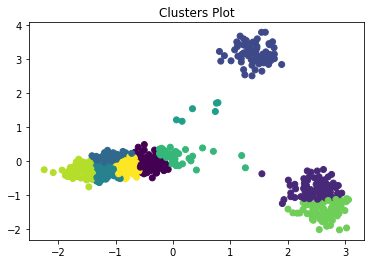

In [44]:
fig = plt.plot(figsize=(50,50))
plt.scatter(df_for_clusters["Feature1"], df_for_clusters["Feature2"], c=df_for_clusters['Labels'])
plt.title("Clusters Plot")
plt.show()